In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Pre-Processing

In [38]:
chemical_data = pd.read_csv('/content/linear-regression.csv')
scaler = StandardScaler()
scaler.fit(chemical_data)
standardized_data = scaler.transform(chemical_data)
chemical_data = standardized_data

In [39]:
chemical_data

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

Feature and Target assignment

In [40]:
X = chemical_data[:,:-1]
y = chemical_data[:,-1]

In [41]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [42]:
y

array([-0.78782264, -0.78782264, -0.78782264, ...,  0.45084835,
       -0.78782264,  0.45084835])

Assign Train, Test and Evaluation Data

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_testeval,y_train,y_testeval = train_test_split(X,y,test_size=0.5,random_state=2)
X_test,X_eval,y_test,y_eval = train_test_split(X_testeval,y_testeval,test_size=0.4,random_state=2)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(X_eval.shape)

(799, 11)
(480, 11)
(320, 11)


Linear Regression Analytical

In [46]:
class Linear_Regression_Analytical:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

In [47]:
lr = Linear_Regression_Analytical()

In [48]:
lr.fit(X_train,y_train)

In [49]:
X_train.shape

(799, 11)

In [50]:
np.insert(X_train,0,1,axis=1).shape

(799, 12)

In [51]:
y_pred = lr.predict(X_eval)

In [52]:
y_pred

array([ 9.05208870e-01,  2.36166101e-01,  1.60877043e-01, -1.19577944e+00,
        3.10219948e-01,  7.09912301e-01,  1.56960249e+00, -5.59835033e-01,
       -2.41194110e-01,  7.77405965e-01, -8.66859629e-01, -5.77081831e-01,
        1.08874304e-01,  3.57586827e-01,  5.21803331e-01, -3.65603017e-01,
       -4.14747271e-01, -7.03378961e-02,  5.36041865e-02,  9.16113836e-01,
        6.26522526e-01,  4.25471896e-01, -4.48373953e-01, -4.75742123e-01,
       -9.49878669e-01, -1.73869016e-01,  5.67267030e-01, -6.72080410e-01,
       -5.74522170e-01, -7.39614870e-01, -9.38498048e-01, -4.68263973e-01,
        8.27306796e-01,  3.24097229e-01, -2.42472114e-01,  9.60538927e-01,
        1.90899329e-01, -2.93891770e-01, -7.67633905e-01, -7.70044716e-01,
        3.24285201e-01, -4.29358209e-01, -5.09127373e-01, -9.20572511e-01,
        6.87691178e-01,  2.62184592e-01,  1.09508552e+00, -9.80882842e-01,
       -7.47761615e-01, -3.44665113e-01,  1.33337910e+00, -5.18190030e-01,
        8.21096921e-02,  

In [53]:
from sklearn.metrics import r2_score
r2_score(y_eval,y_pred)

0.38644867272517447

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_eval,y_pred)

0.6183291816953717

In [55]:
lr.coef_

array([ 0.06900213, -0.2667446 , -0.05202397, -0.03892874, -0.11004562,
        0.05776122, -0.11517062,  0.02110622, -0.07267331,  0.16011144,
        0.40419222])

In [56]:
lr.intercept_

-0.04787198225974796

Gradient Descent

In [57]:
class Linear_Regression_GD():
   def __init__( self, learning_rate, no_of_iterations ) :
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.loss_array = []

   def fit( self, X, Y ) :
        self.m, self.n = X.shape

        #initiating the weight and bias
        self.w = np.random.rand( self.n )
        self.b = random.random()
        self.X = X
        self.Y = Y

        #implementing Gradient Descent for Optimization for no of iterations
        for i in range( self.no_of_iterations ) :
            self.update_weights()

    #function to update weights in gradient descent
   def update_weights( self ) :
        Y_prediction = self.predict( self.X )
        Y_prediction = np.float128(Y_prediction)

        dw =  - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m
        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        dw=np.float128(dw)
        db=np.float128(db)

        #updating the weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        j = (1/2)*np.mean((self.Y-Y_prediction)**2)
        self.loss_array.append(j);

    #prediction:
   def predict( self, X ) :
        return X.dot( self.w ) + self.b

In [58]:
gd = Linear_Regression_GD(learning_rate = 0.01, no_of_iterations=30000)

In [59]:
gd.fit(X_train,y_train)

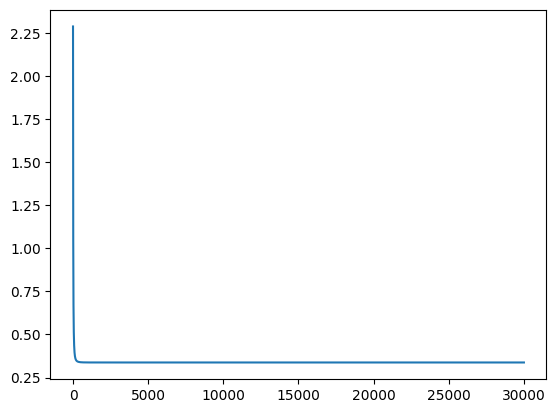

In [60]:
import matplotlib.pyplot as plt

ypoints = np.array(gd.loss_array)

plt.plot(ypoints)
plt.show()

In [61]:
gd = Linear_Regression_GD(learning_rate = 0.001, no_of_iterations=30000)
gd.fit(X_train,y_train)

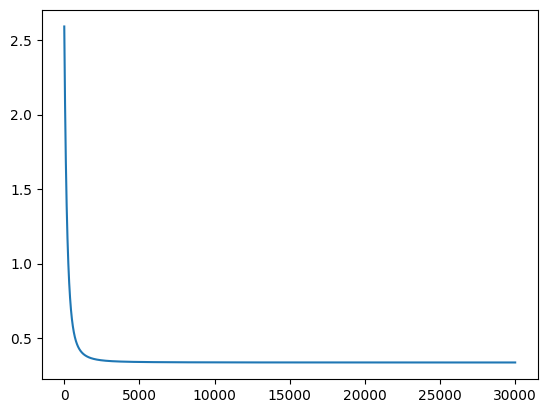

In [62]:
import matplotlib.pyplot as plt

ypoints = np.array(gd.loss_array)

plt.plot(ypoints)
plt.show()

In [63]:
gd = Linear_Regression_GD(learning_rate = 0.0001, no_of_iterations=30000)
gd.fit(X_train,y_train)

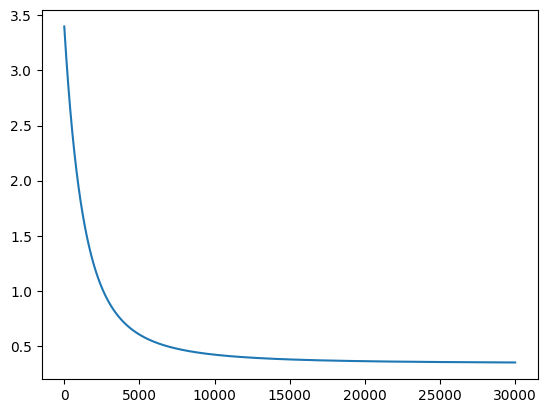

In [64]:
import matplotlib.pyplot as plt

ypoints = np.array(gd.loss_array)

plt.plot(ypoints)
plt.show()

In [65]:
y_pred = gd.predict(X_eval)

In [66]:
y_pred

array([ 8.78703811e-01,  1.26361100e-01,  2.22362427e-01, -7.37481135e-01,
        3.36959627e-01,  5.88708571e-01,  1.58631104e+00, -4.43020586e-01,
       -2.56452648e-01,  6.79455282e-01, -7.33738262e-01, -7.59593610e-01,
       -1.51700105e-01,  3.58994525e-01,  6.55057890e-01, -4.88055021e-01,
       -4.45871075e-01, -4.40996008e-01,  5.47358943e-02,  6.77930687e-01,
        7.09447200e-01,  1.71204975e-01, -4.39936697e-01, -4.10911536e-01,
       -8.21011179e-01, -2.01172791e-01,  5.64716930e-01, -7.22819763e-01,
       -5.26466904e-01, -2.75441187e-01, -5.99284061e-01, -4.25274529e-01,
        8.01387322e-01,  2.25006887e-01, -3.81634445e-01,  1.04367501e+00,
        9.82331607e-02, -4.57993840e-01, -7.85864308e-01, -7.77730247e-01,
        1.97139171e-01, -4.44335833e-01, -5.52672869e-01, -7.74771857e-01,
        6.24256673e-01, -1.89445058e-02,  1.04602191e+00, -8.07341289e-01,
       -6.03563211e-01, -4.66103504e-01,  1.38465785e+00, -4.23091399e-01,
       -1.10609437e-01,  

In [67]:
from sklearn.metrics import r2_score
#y_pred=np.float128(y_pred)
r2_score(y_eval,y_pred)


0.3534119294782815

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_eval,y_pred)

0.6516231890744501779